In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from google.colab import auth
from google.cloud import bigquery

In [2]:
auth.authenticate_user()
client = bigquery.Client("proyecto3-riesgo-relativo-lab")

In [3]:
project_id = "proyecto3-riesgo-relativo-lab"
dataset = "Dataset"
table = "tabla_score_h2"

In [4]:
query = """
SELECT user_id, age, last_month_salary, number_dependents, default_flag, clasificacion, suma_puntaje, total_loans, more_90_days_overdue, debt_ratio, using_lines_not_secured_personal_assets
FROM `proyecto3-riesgo-relativo-lab.Dataset.tabla_score_h2`
"""

In [5]:
df = client.query(query).to_dataframe()

In [6]:
print(df.head())

   user_id  age  last_month_salary  number_dependents  default_flag  \
0     2303   21               6715                  0             0   
1     2932   21               6715                  0             0   
2     3985   21               3300                  0             0   
3     4732   21                550                  0             0   
4     8870   21               6715                  0             0   

  clasificacion  suma_puntaje  total_loans  more_90_days_overdue  debt_ratio  \
0   Mal pagador             4            1                     0         672   
1  Buen pagador             3            1                     0           9   
2   Mal pagador             4            1                     0           0   
3   Mal pagador             5            1                     0           0   
4   Mal pagador             4            1                     0           0   

   using_lines_not_secured_personal_assets  
0                                        1  
1 

**HITO 3: REGRESIÓN LOGÍSTICA**

**1. last_month_salary**

In [7]:
# Regresion Logica last_month_salary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
#definiendo input y output
df['clasificacion_encoded'] = df['clasificacion'].map({'Buen pagador': 0, 'Mal pagador': 1})
X = df[['last_month_salary']]  # Puedes cambiar a otra variable como 'edad', 'debt_ratio', etc.
y = df['clasificacion_encoded']

X_train = np.array(df['last_month_salary']).reshape(-1, 1)
y_train = np.array(df['clasificacion_encoded'])

In [9]:
# Crear el modelo de regresión logística
model = LogisticRegression()
# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
#Imprimiendo parametros
print(f"Intercepto (b): {model.intercept_}")
print(f"Intercepto (w): {model.coef_}")

Intercepto (b): [8.91667241e-09]
Intercepto (w): [[-0.00020094]]


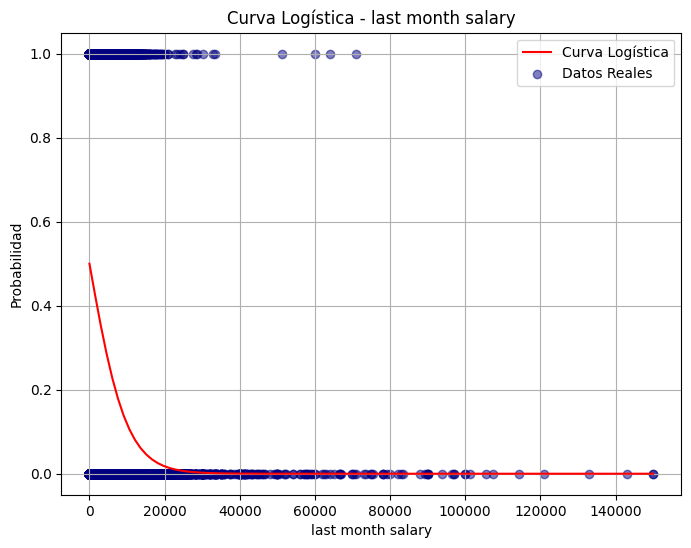

In [11]:
# Crear un rango de valores para la variable independiente
x_values = np.linspace(X.min(), X.max(), 100)

# Calcular las probabilidades predichas
y_prob = model.predict_proba(x_values)[:, 1]

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar la curva logística
ax.plot(x_values, y_prob, label='Curva Logística', color='red')

# Graficar los puntos de datos
ax.scatter(X, y, label='Datos Reales', color='navy', alpha=0.5)

# Personalizar el gráfico
ax.set_xlabel('last month salary')
ax.set_ylabel('Probabilidad')
ax.set_title('Curva Logística - last month salary')
ax.legend()

# Agregar cuadrícula
plt.grid(True)

plt.show()

Matriz de Confusión:
[[25922   243]
 [ 9267   126]]
Reporte de Clasificación:
              precision    recall  f1-score   support

Buen Pagador       0.74      0.99      0.84     26165
 Mal Pagador       0.34      0.01      0.03      9393

    accuracy                           0.73     35558
   macro avg       0.54      0.50      0.44     35558
weighted avg       0.63      0.73      0.63     35558



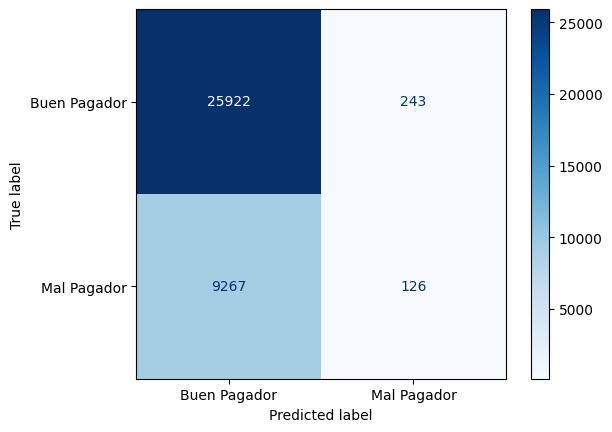

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Usar el modelo entrenado para predecir en los datos de entrenamiento
y_pred = model.predict(X_train)

# Calcular la matriz de confusión
cm = confusion_matrix(y_train, y_pred, labels=[0, 1])

# Imprimir la matriz de confusión
print('Matriz de Confusión:')
print(cm)

# Calcular y mostrar el reporte de clasificación
report = classification_report(y_train, y_pred, labels=[0, 1], target_names=['Buen Pagador', 'Mal Pagador'])
print('Reporte de Clasificación:')
print(report)

# Crear y mostrar la matriz de confusión gráficamente
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Buen Pagador', 'Mal Pagador'])
cm_display.plot(cmap=plt.cm.Blues)

# Mostrar el gráfico
plt.show()


**2. Age**

In [13]:
#Regresion logica edad
#definiendo input y output
df['clasificacion_encoded'] = df['clasificacion'].map({'Buen pagador': 0, 'Mal pagador': 1})
X = df[['age']]  # Puedes cambiar a otra variable como 'edad', 'debt_ratio', etc.
y = df['clasificacion_encoded']

X_train = np.array(df['age']).reshape(-1, 1)
y_train = np.array(df['clasificacion_encoded'])

In [14]:
# Crear el modelo de regresión logística
model = LogisticRegression()
# Entrenar el modelo
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
#Imprimiendo parametros
print(f"Intercepto (b): {model.intercept_}")
print(f"Intercepto (w): {model.coef_}")

Intercepto (b): [3.25690822]
Intercepto (w): [[-0.08802345]]


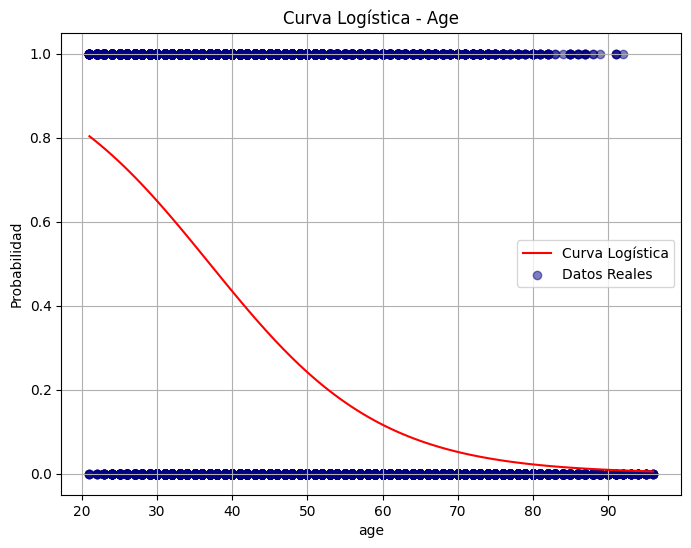

In [16]:
# Crear un rango de valores para la variable independiente
x_values = np.linspace(X.min(), X.max(), 100)

# Calcular las probabilidades predichas
y_prob = model.predict_proba(x_values)[:, 1]

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar la curva logística
ax.plot(x_values, y_prob, label='Curva Logística', color='red')

# Graficar los puntos de datos
ax.scatter(X, y, label='Datos Reales', color='navy', alpha=0.5)

# Personalizar el gráfico
ax.set_xlabel('age')
ax.set_ylabel('Probabilidad')
ax.set_title('Curva Logística - Age')
ax.legend()

# Agregar cuadrícula
plt.grid(True)

plt.show()

Matriz de Confusión - Edad:
[[23632  2533]
 [ 5852  3541]]
Reporte de Clasificación:
              precision    recall  f1-score   support

Buen Pagador       0.80      0.90      0.85     26165
 Mal Pagador       0.58      0.38      0.46      9393

    accuracy                           0.76     35558
   macro avg       0.69      0.64      0.65     35558
weighted avg       0.74      0.76      0.75     35558



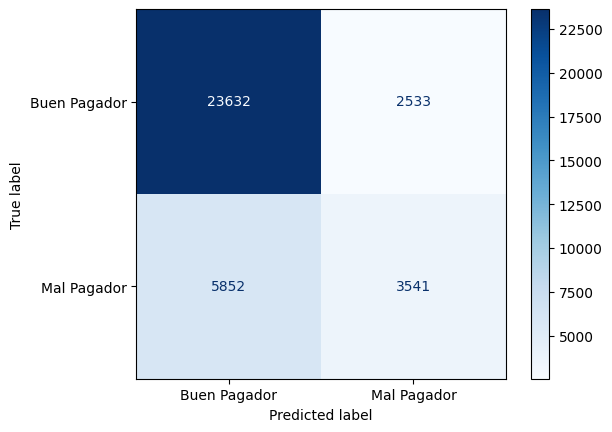

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Usar el modelo entrenado para predecir en los datos de entrenamiento
y_pred = model.predict(X_train)

# Calcular la matriz de confusión
cm = confusion_matrix(y_train, y_pred, labels=[0, 1])

# Imprimir la matriz de confusión
print('Matriz de Confusión - Edad:')
print(cm)

# Calcular y mostrar el reporte de clasificación
report = classification_report(y_train, y_pred, labels=[0, 1], target_names=['Buen Pagador', 'Mal Pagador'])
print('Reporte de Clasificación:')
print(report)

# Crear y mostrar la matriz de confusión gráficamente
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Buen Pagador', 'Mal Pagador'])
cm_display.plot(cmap=plt.cm.Blues)

# Mostrar el gráfico
plt.show()

**3. number_dependents**

Intercepto (b): [-1.15978285]
Intercepto (w): [[0.17156804]]


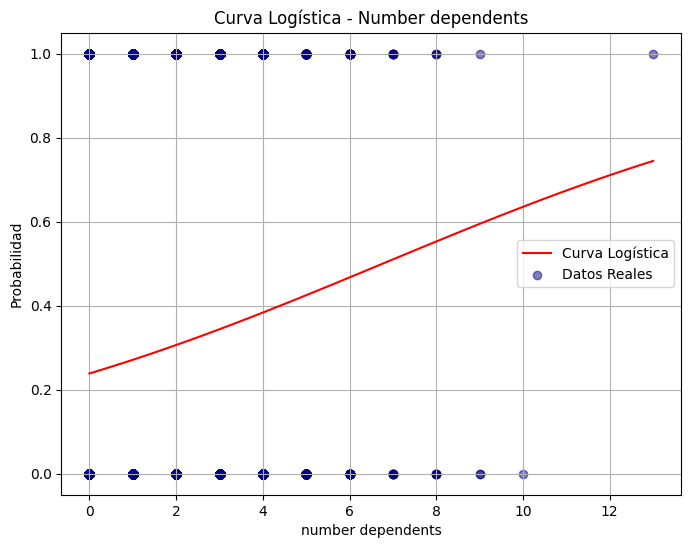

In [18]:
#Regresion logica dependientes
#definiendo input y output
df['clasificacion_encoded'] = df['clasificacion'].map({'Buen pagador': 0, 'Mal pagador': 1})
X = df[['number_dependents']]  # Puedes cambiar a otra variable como 'edad', 'debt_ratio', etc.
y = df['clasificacion_encoded']

X_train = np.array(df['number_dependents']).reshape(-1, 1)
y_train = np.array(df['clasificacion_encoded'])

# Crear el modelo de regresión logística
model = LogisticRegression()
# Entrenar el modelo
model.fit(X_train, y_train)

#Imprimiendo parametros
print(f"Intercepto (b): {model.intercept_}")
print(f"Intercepto (w): {model.coef_}")

# Crear un rango de valores para la variable independiente
x_values = np.linspace(X.min(), X.max(), 100)

# Calcular las probabilidades predichas
y_prob = model.predict_proba(x_values)[:, 1]

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar la curva logística
ax.plot(x_values, y_prob, label='Curva Logística', color='red')

# Graficar los puntos de datos
ax.scatter(X, y, label='Datos Reales', color='navy', alpha=0.5)

# Personalizar el gráfico
ax.set_xlabel('number dependents')
ax.set_ylabel('Probabilidad')
ax.set_title('Curva Logística - Number dependents')
ax.legend()

# Agregar cuadrícula
plt.grid(True)

plt.show()

Matriz de Confusión - Dependientes:
[[26151    14]
 [ 9382    11]]
Reporte de Clasificación:
              precision    recall  f1-score   support

Buen Pagador       0.74      1.00      0.85     26165
 Mal Pagador       0.44      0.00      0.00      9393

    accuracy                           0.74     35558
   macro avg       0.59      0.50      0.43     35558
weighted avg       0.66      0.74      0.62     35558



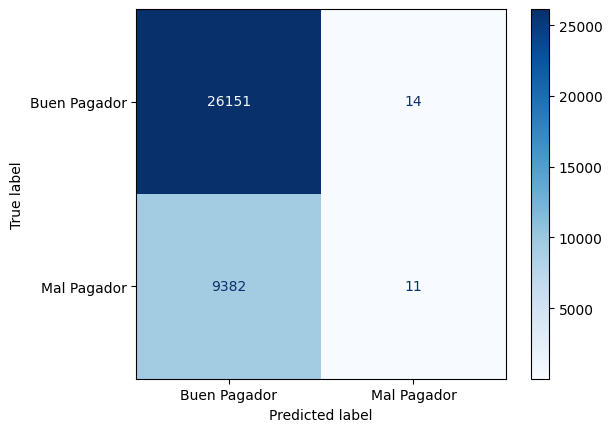

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Usar el modelo entrenado para predecir en los datos de entrenamiento
y_pred = model.predict(X_train)

# Calcular la matriz de confusión
cm = confusion_matrix(y_train, y_pred, labels=[0, 1])

# Imprimir la matriz de confusión
print('Matriz de Confusión - Dependientes:')
print(cm)

# Calcular y mostrar el reporte de clasificación
report = classification_report(y_train, y_pred, labels=[0, 1], target_names=['Buen Pagador', 'Mal Pagador'])
print('Reporte de Clasificación:')
print(report)

# Crear y mostrar la matriz de confusión gráficamente
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Buen Pagador', 'Mal Pagador'])
cm_display.plot(cmap=plt.cm.Blues)

# Mostrar el gráfico
plt.show()


**4. more_90_days_overdue**

Intercepto (b): [-1.15855932]
Intercepto (w): [[1.70795417]]


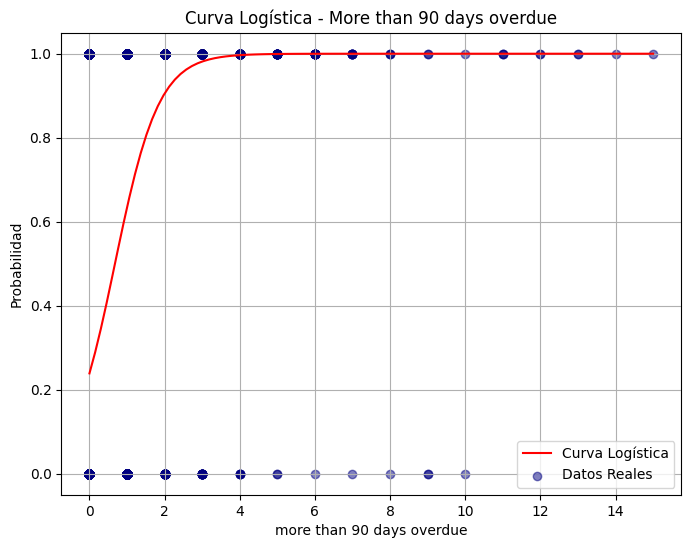

In [20]:
#Regresion logistica mas de 90 dias
#definiendo input y output
df['clasificacion_encoded'] = df['clasificacion'].map({'Buen pagador': 0, 'Mal pagador': 1})
X = df[['more_90_days_overdue']]  # Puedes cambiar a otra variable como 'edad', 'debt_ratio', etc.
y = df['clasificacion_encoded']

X_train = np.array(df['more_90_days_overdue']).reshape(-1, 1)
y_train = np.array(df['clasificacion_encoded'])

# Crear el modelo de regresión logística
model = LogisticRegression()
# Entrenar el modelo
model.fit(X_train, y_train)

#Imprimiendo parametros
print(f"Intercepto (b): {model.intercept_}")
print(f"Intercepto (w): {model.coef_}")

# Crear un rango de valores para la variable independiente
x_values = np.linspace(X.min(), X.max(), 100)

# Calcular las probabilidades predichas
y_prob = model.predict_proba(x_values)[:, 1]

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar la curva logística
ax.plot(x_values, y_prob, label='Curva Logística', color='red')

# Graficar los puntos de datos
ax.scatter(X, y, label='Datos Reales', color='navy', alpha=0.5)

# Personalizar el gráfico
ax.set_xlabel('more than 90 days overdue')
ax.set_ylabel('Probabilidad')
ax.set_title('Curva Logística - More than 90 days overdue')
ax.legend()

# Agregar cuadrícula
plt.grid(True)

plt.show()

Matriz de Confusión - more_90_days_overdue:
[[25819   346]
 [ 7965  1428]]
Reporte de Clasificación:
              precision    recall  f1-score   support

Buen Pagador       0.76      0.99      0.86     26165
 Mal Pagador       0.80      0.15      0.26      9393

    accuracy                           0.77     35558
   macro avg       0.78      0.57      0.56     35558
weighted avg       0.77      0.77      0.70     35558



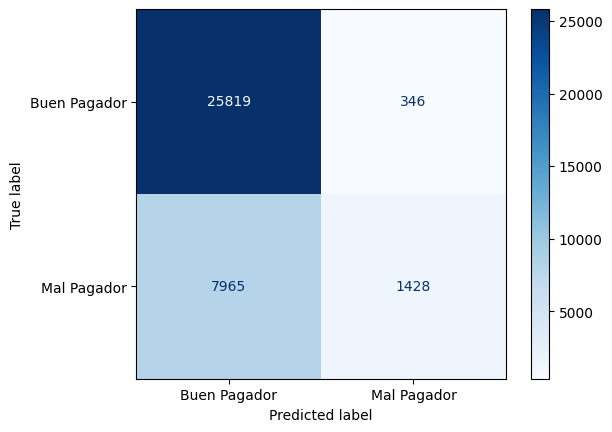

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Usar el modelo entrenado para predecir en los datos de entrenamiento
y_pred = model.predict(X_train)

# Calcular la matriz de confusión
cm = confusion_matrix(y_train, y_pred, labels=[0, 1])

# Imprimir la matriz de confusión
print('Matriz de Confusión - more_90_days_overdue:')
print(cm)

# Calcular y mostrar el reporte de clasificación
report = classification_report(y_train, y_pred, labels=[0, 1], target_names=['Buen Pagador', 'Mal Pagador'])
print('Reporte de Clasificación:')
print(report)

# Crear y mostrar la matriz de confusión gráficamente
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Buen Pagador', 'Mal Pagador'])
cm_display.plot(cmap=plt.cm.Blues)

# Mostrar el gráfico
plt.show()

**5. total_loans**

Intercepto (b): [0.21052218]
Intercepto (w): [[-0.16115357]]


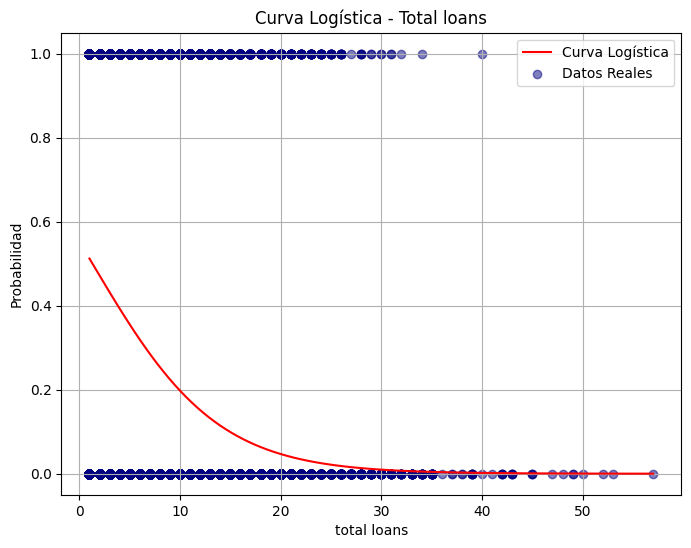

In [22]:
#Regresion logistica total loans
#definiendo input y output
df['clasificacion_encoded'] = df['clasificacion'].map({'Buen pagador': 0, 'Mal pagador': 1})
X = df[['total_loans']]  # Puedes cambiar a otra variable como 'edad', 'debt_ratio', etc.
y = df['clasificacion_encoded']

X_train = np.array(df['total_loans']).reshape(-1, 1)
y_train = np.array(df['clasificacion_encoded'])

# Crear el modelo de regresión logística
model = LogisticRegression()
# Entrenar el modelo
model.fit(X_train, y_train)

#Imprimiendo parametros
print(f"Intercepto (b): {model.intercept_}")
print(f"Intercepto (w): {model.coef_}")

# Crear un rango de valores para la variable independiente
x_values = np.linspace(X.min(), X.max(), 100)

# Calcular las probabilidades predichas
y_prob = model.predict_proba(x_values)[:, 1]

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar la curva logística
ax.plot(x_values, y_prob, label='Curva Logística', color='red')

# Graficar los puntos de datos
ax.scatter(X, y, label='Datos Reales', color='navy', alpha=0.5)

# Personalizar el gráfico
ax.set_xlabel('total loans')
ax.set_ylabel('Probabilidad')
ax.set_title('Curva Logística - Total loans')
ax.legend()

# Agregar cuadrícula
plt.grid(True)

plt.show()

Matriz de Confusión - Total Prestamos:
[[25818   347]
 [ 8676   717]]
Reporte de Clasificación:
              precision    recall  f1-score   support

Buen Pagador       0.75      0.99      0.85     26165
 Mal Pagador       0.67      0.08      0.14      9393

    accuracy                           0.75     35558
   macro avg       0.71      0.53      0.49     35558
weighted avg       0.73      0.75      0.66     35558



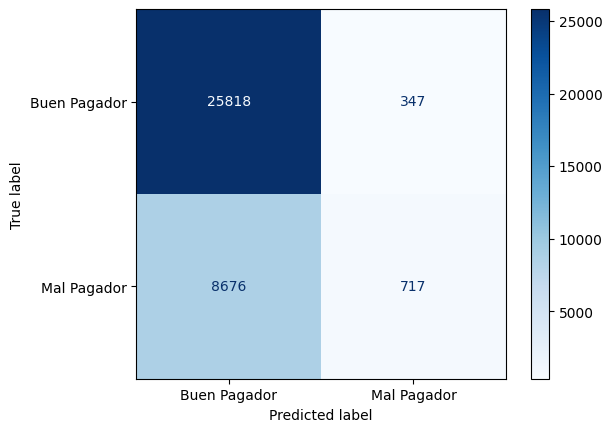

In [23]:
#matriz de confusion

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Usar el modelo entrenado para predecir en los datos de entrenamiento
y_pred = model.predict(X_train)

# Calcular la matriz de confusión
cm = confusion_matrix(y_train, y_pred, labels=[0, 1])

# Imprimir la matriz de confusión
print('Matriz de Confusión - Total Prestamos:')
print(cm)

# Calcular y mostrar el reporte de clasificación
report = classification_report(y_train, y_pred, labels=[0, 1], target_names=['Buen Pagador', 'Mal Pagador'])
print('Reporte de Clasificación:')
print(report)

# Crear y mostrar la matriz de confusión gráficamente
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Buen Pagador', 'Mal Pagador'])
cm_display.plot(cmap=plt.cm.Blues)

# Mostrar el gráfico
plt.show()

**6. debt_ratio**

Intercepto (b): [-0.88221333]
Intercepto (w): [[-0.00073381]]


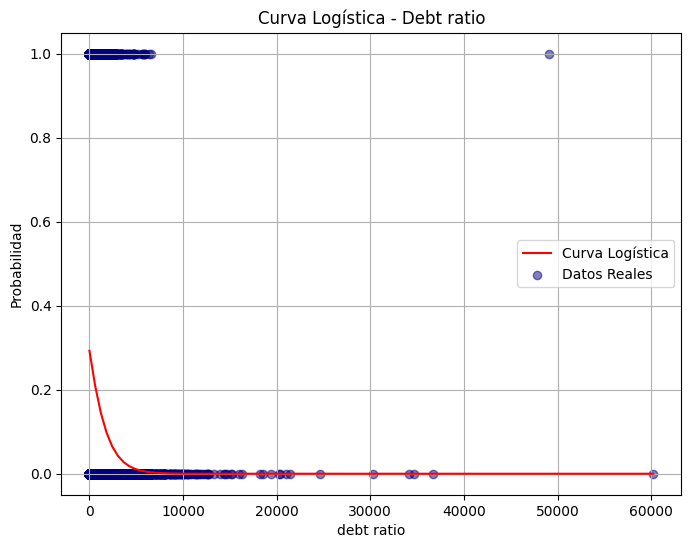

In [24]:
#Regresion logistica debt_ratio
#definiendo input y output
df['clasificacion_encoded'] = df['clasificacion'].map({'Buen pagador': 0, 'Mal pagador': 1})
X = df[['debt_ratio']]  # Puedes cambiar a otra variable como 'edad', 'debt_ratio', etc.
y = df['clasificacion_encoded']

X_train = np.array(df['debt_ratio']).reshape(-1, 1)
y_train = np.array(df['clasificacion_encoded'])

# Crear el modelo de regresión logística
model = LogisticRegression()
# Entrenar el modelo
model.fit(X_train, y_train)

#Imprimiendo parametros
print(f"Intercepto (b): {model.intercept_}")
print(f"Intercepto (w): {model.coef_}")

# Crear un rango de valores para la variable independiente
x_values = np.linspace(X.min(), X.max(), 100)

# Calcular las probabilidades predichas
y_prob = model.predict_proba(x_values)[:, 1]

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar la curva logística
ax.plot(x_values, y_prob, label='Curva Logística', color='red')

# Graficar los puntos de datos
ax.scatter(X, y, label='Datos Reales', color='navy', alpha=0.5)

# Personalizar el gráfico
ax.set_xlabel('debt ratio')
ax.set_ylabel('Probabilidad')
ax.set_title('Curva Logística - Debt ratio')
ax.legend()

# Agregar cuadrícula
plt.grid(True)

plt.show()

Matriz de Confusión - Debt Ratio:
[[26165     0]
 [ 9393     0]]
Reporte de Clasificación:
              precision    recall  f1-score   support

Buen Pagador       0.74      1.00      0.85     26165
 Mal Pagador       0.00      0.00      0.00      9393

    accuracy                           0.74     35558
   macro avg       0.37      0.50      0.42     35558
weighted avg       0.54      0.74      0.62     35558



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


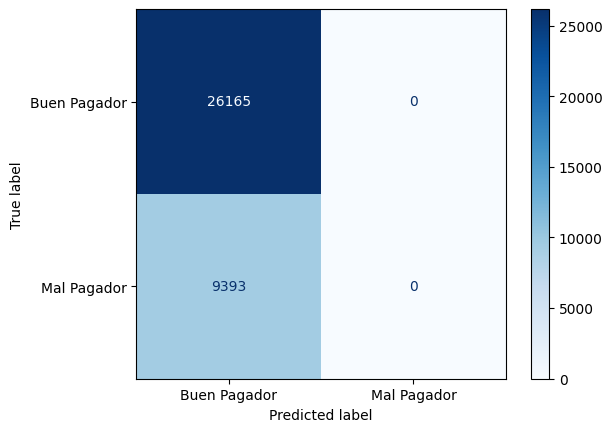

In [25]:
#matriz de confusion

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Usar el modelo entrenado para predecir en los datos de entrenamiento
y_pred = model.predict(X_train)

# Calcular la matriz de confusión
cm = confusion_matrix(y_train, y_pred, labels=[0, 1])

# Imprimir la matriz de confusión
print('Matriz de Confusión - Debt Ratio:')
print(cm)

# Calcular y mostrar el reporte de clasificación
report = classification_report(y_train, y_pred, labels=[0, 1], target_names=['Buen Pagador', 'Mal Pagador'])
print('Reporte de Clasificación:')
print(report)

# Crear y mostrar la matriz de confusión gráficamente
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Buen Pagador', 'Mal Pagador'])
cm_display.plot(cmap=plt.cm.Blues)

# Mostrar el gráfico
plt.show()

**7. using_lines_not_secured_personl_assets**

Intercepto (b): [-1.02585147]
Intercepto (w): [[0.00022335]]


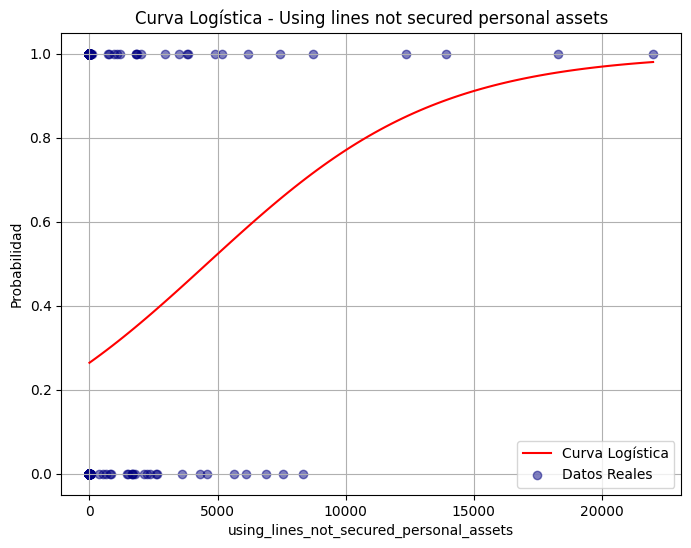

In [28]:
#Regresion logistica Ratio de credito
#definiendo input y output
df['clasificacion_encoded'] = df['clasificacion'].map({'Buen pagador': 0, 'Mal pagador': 1})
X = df[['using_lines_not_secured_personal_assets']]  # Puedes cambiar a otra variable como 'edad', 'debt_ratio', etc.
y = df['clasificacion_encoded']

X_train = np.array(df['using_lines_not_secured_personal_assets']).reshape(-1, 1)
y_train = np.array(df['clasificacion_encoded'])

# Crear el modelo de regresión logística
model = LogisticRegression()
# Entrenar el modelo
model.fit(X_train, y_train)

#Imprimiendo parametros
print(f"Intercepto (b): {model.intercept_}")
print(f"Intercepto (w): {model.coef_}")

# Crear un rango de valores para la variable independiente
x_values = np.linspace(X.min(), X.max(), 100)

# Calcular las probabilidades predichas
y_prob = model.predict_proba(x_values)[:, 1]

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar la curva logística
ax.plot(x_values, y_prob, label='Curva Logística', color='red')

# Graficar los puntos de datos
ax.scatter(X, y, label='Datos Reales', color='navy', alpha=0.5)

# Personalizar el gráfico
ax.set_xlabel('using_lines_not_secured_personal_assets')
ax.set_ylabel('Probabilidad')
ax.set_title('Curva Logística - Using lines not secured personal assets')
ax.legend()

# Agregar cuadrícula
plt.grid(True)

plt.show()

Matriz de Confusión - Ratio de credito:
[[26160     5]
 [ 9384     9]]
Reporte de Clasificación:
              precision    recall  f1-score   support

Buen Pagador       0.74      1.00      0.85     26165
 Mal Pagador       0.64      0.00      0.00      9393

    accuracy                           0.74     35558
   macro avg       0.69      0.50      0.42     35558
weighted avg       0.71      0.74      0.62     35558



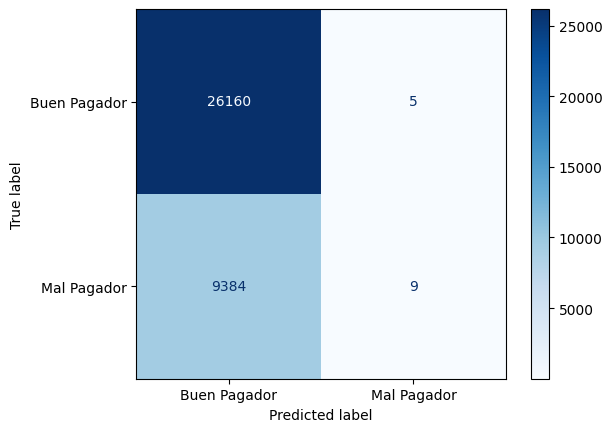

In [27]:
#matriz de confusion

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Usar el modelo entrenado para predecir en los datos de entrenamiento
y_pred = model.predict(X_train)

# Calcular la matriz de confusión
cm = confusion_matrix(y_train, y_pred, labels=[0, 1])

# Imprimir la matriz de confusión
print('Matriz de Confusión - Ratio de credito:')
print(cm)

# Calcular y mostrar el reporte de clasificación
report = classification_report(y_train, y_pred, labels=[0, 1], target_names=['Buen Pagador', 'Mal Pagador'])
print('Reporte de Clasificación:')
print(report)

# Crear y mostrar la matriz de confusión gráficamente
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Buen Pagador', 'Mal Pagador'])
cm_display.plot(cmap=plt.cm.Blues)

# Mostrar el gráfico
plt.show()
